In [2]:
#feature selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
target_df =pd.DataFrame(boston.target)
target_df.columns=['PRICE']
target_df.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(bos,target_df)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

importances [0.03471508 0.00077918 0.00528333 0.00071711 0.02325583 0.42525205
 0.01204471 0.06823625 0.00260498 0.01342757 0.01841127 0.01183494
 0.38343769]
[ 3  1  8  2 11  6  9 10  4  0  7 12  5]


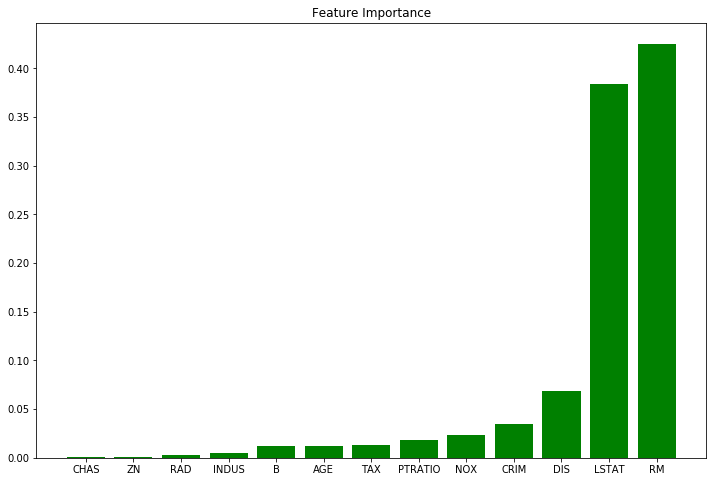

In [8]:
features = bos.columns
importances = model.feature_importances_

plt.figure(figsize=(12, 8))
print ('importances',importances)
index_for_importance_features = np.argsort(importances) 
print(index_for_importance_features)
plt.title('Feature Importance')
plt.bar(range(len(index_for_importance_features)), importances[index_for_importance_features], color='g')
plt.xticks(range(len(index_for_importance_features)), [features[i] for i in index_for_importance_features])

plt.show()

In [ ]:
download csv data from here https://www.kaggle.com/c/cuny-csi-fashion-mnist/data?select=train.csv

    
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, 
where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, 
and the second row from the top, as in the ascii-diagram below.


use only 2000 rows 
head -2001 train.csv > train_2000_rows.csv


In [11]:
import pandas as pd

mnist_data = pd.read_csv('train_2000_rows.csv')
mnist_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

X =  mnist_data.iloc[:, 1:].values
y =  mnist_data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

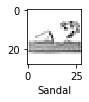

In [21]:
#look at few images 

import matplotlib.pyplot as plt

plt.figure(figsize=(1,1))

plt.imshow(X_train[0].reshape(28, 28), cmap="binary")
plt.xlabel(labels[y_train[0]])
plt.show()



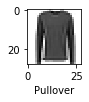

In [22]:
#look at few images 

import matplotlib.pyplot as plt

plt.figure(figsize=(1,1))

plt.imshow(X_train[2].reshape(28, 28), cmap="binary")
plt.xlabel(labels[y_train[2]])
plt.show()


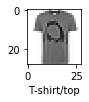

In [23]:
#look at few images 

import matplotlib.pyplot as plt

plt.figure(figsize=(1,1))

plt.imshow(X_train[1000].reshape(28, 28), cmap="binary")
plt.xlabel(labels[y_train[1000]])
plt.show()

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
#to explain 90% of variance
#pca = PCA(n_components = 75)
#upon using 90 percent and finding length of pca.explained_variance_ratio_, 
# found that number of components needed is 75
X_dimension_reduced = pca.fit_transform(X_train)

In [130]:
pca.explained_variance_ratio_


array([0.28787606, 0.17719219, 0.0622009 , 0.04842095, 0.03993166,
       0.03681644, 0.02273841, 0.01923902, 0.01499581, 0.01302894,
       0.00996471, 0.00933554, 0.00810615, 0.00680433, 0.00644035,
       0.00632705, 0.00579732, 0.00526105, 0.00485383, 0.00456198,
       0.00438141, 0.00411063, 0.00383126, 0.00379413, 0.00362296,
       0.00355332, 0.00346992, 0.00322975, 0.00311404, 0.00297462,
       0.00283853, 0.00278181, 0.00273354, 0.0026167 , 0.00259676,
       0.0024565 , 0.00232193, 0.0023079 , 0.00223395, 0.00213201,
       0.00205689, 0.00205384, 0.00192429, 0.00189916, 0.00184062,
       0.00179127, 0.00175991, 0.00169763, 0.00164575, 0.00162972,
       0.00156209, 0.0015592 , 0.00154336, 0.00148462, 0.00147099,
       0.00143963, 0.00138205, 0.00137455, 0.00134067, 0.00132457,
       0.00126844, 0.00125317, 0.00122363, 0.00121259, 0.0011943 ,
       0.00118402, 0.00115244, 0.00114176, 0.00110183, 0.0010982 ,
       0.00106539, 0.00104123, 0.0010062 , 0.00099981, 0.00098

In [131]:
len(pca.explained_variance_ratio_)

75

In [132]:
sum(pca.explained_variance_ratio_)

0.9007039551719133

In [133]:
#rebuild data again

pca = PCA(n_components = 75)
X_dimension_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_dimension_reduced)

In [134]:
sum(pca.explained_variance_ratio_)

0.9007251562703898

dimenstion reduced image


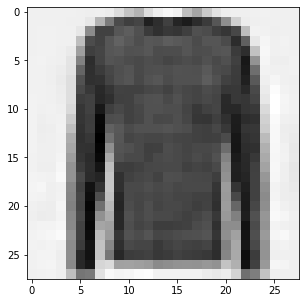

In [48]:
print('dimenstion reduced image')

plt.figure(figsize=(5,5))
plt.imshow(X_recovered[2].reshape(28, 28), cmap="binary")
plt.show()

original image


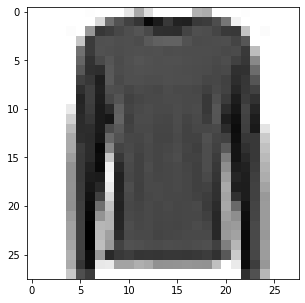

In [49]:
print('original image')

plt.figure(figsize=(5,5))
plt.imshow(X_train[2].reshape(28, 28), cmap="binary")
plt.show()

In [ ]:
#alternate way to get dataset
#download images and use opencv to read image and then flatten

#https://github.com/zalandoresearch/fashion-mnist

In [ ]:
download png and copy about 100 images from category=2 to new folder
https://github.com/DeepLenin/fashion-mnist_png
ls -ltr data/
cp data/train/2/10* mnist_data_png/

In [137]:
import cv2
import os
image_list = []
for f in os.listdir('mnist_data_png/'):
    #print (f)
    file_name = f"mnist_data_png/{f}"
    image_list.append(cv2.imread(file_name))
    
len(image_list)
    


105

In [138]:
images_np_array = np.array(image_list)
images_np_array.shape

(105, 28, 28, 3)

In [82]:
#flatten_image

flatten_image = []
for i in range(0,105):
    im = images_np_array[i].flatten()
    flatten_image.append(im)
flatten_image_np_array = np.array(flatten_image)
flatten_image_np_array.shape

(105, 2352)

In [110]:
cols = [ 'pixel'+str(i) for i in range(flatten_image_np_array.shape[1]) ]
cols[0:3]


['pixel0', 'pixel1', 'pixel2']

In [111]:
df = pd.DataFrame(flatten_image_np_array,columns=cols)
df['label'] = 2
#pull overs

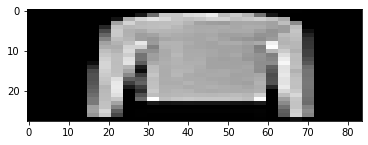

In [112]:
im1 = df.loc[1,feat_cols].values.reshape((28,28*3)).astype(float)
plt.imshow(im1)

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(df[cols].values)

In [115]:
pca.explained_variance_ratio_

array([0.39279757, 0.12237024, 0.05866473, 0.03979502, 0.03422344,
       0.02458311, 0.02278617, 0.02041936, 0.01985491, 0.01620309,
       0.01493185, 0.01291967, 0.01202127, 0.0113323 , 0.01022546,
       0.00903932, 0.00880005, 0.00858478, 0.00789595, 0.00750273,
       0.00706632, 0.00652784, 0.00600413, 0.00580497, 0.0055478 ,
       0.00533766, 0.00499875, 0.00436016])

In [116]:
len(pca.explained_variance_ratio_)

28

In [128]:
sum(pca.explained_variance_ratio_)

0.9005986519317273

In [126]:
#rebuild data again

pca = PCA(n_components = 0.9)
X_dimension_reduced = pca.fit_transform(df[feat_cols].values)
X_recovered = pca.inverse_transform(X_dimension_reduced)
X_recovered.shape

(105, 2352)

dimenstion reduced image


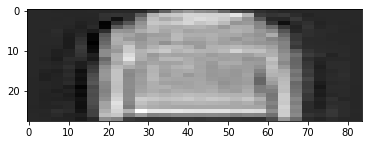

In [127]:
print('dimenstion reduced image')

im1 = X_recovered[2].reshape((28,28*3)).astype(float)
plt.imshow(im1)

In [135]:
#testing only 5 components
# 5 components itself can explain about 64% of variation
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df[cols].values)
sum(pca.explained_variance_ratio_)

0.6478509938952306

In [136]:
pca.explained_variance_ratio_

array([0.39279757, 0.12237024, 0.05866473, 0.03979502, 0.03422344])